# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omdurman
Processing Record 2 of Set 1 | kone
Processing Record 3 of Set 1 | igarka
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | bonito
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | villa dolores
Processing Record 9 of Set 1 | dalnegorsk
Processing Record 10 of Set 1 | kenora
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | esmeraldas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | ban lam luk ka
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | uturoa
Processing Record 23 o

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omdurman,15.6445,32.4777,30.06,9,4,3.59,SD,1714014226
1,kone,-21.0595,164.8658,27.89,61,22,4.49,NC,1714014227
2,igarka,67.4667,86.5833,-7.21,90,79,3.58,RU,1714014228
3,avarua,-21.2078,-159.7750,26.03,73,75,3.09,CK,1714014229
4,bonito,-21.1211,-56.4819,24.30,75,34,1.35,BR,1714014043


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,omdurman,15.6445,32.4777,30.06,9,4,3.59,SD,1714014226
1,kone,-21.0595,164.8658,27.89,61,22,4.49,NC,1714014227
2,igarka,67.4667,86.5833,-7.21,90,79,3.58,RU,1714014228
3,avarua,-21.2078,-159.7750,26.03,73,75,3.09,CK,1714014229
4,bonito,-21.1211,-56.4819,24.30,75,34,1.35,BR,1714014043


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

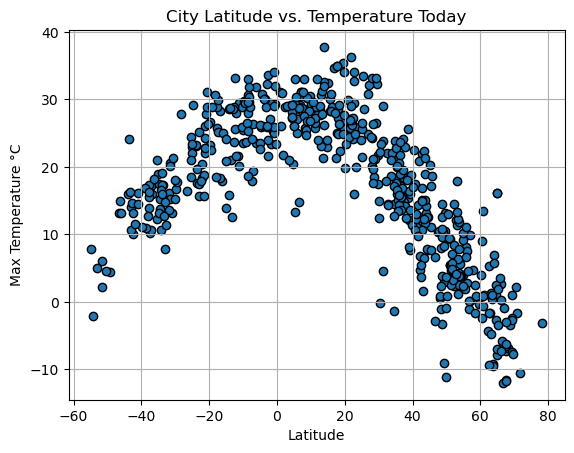

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title("City Latitude vs. Temperature Today")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

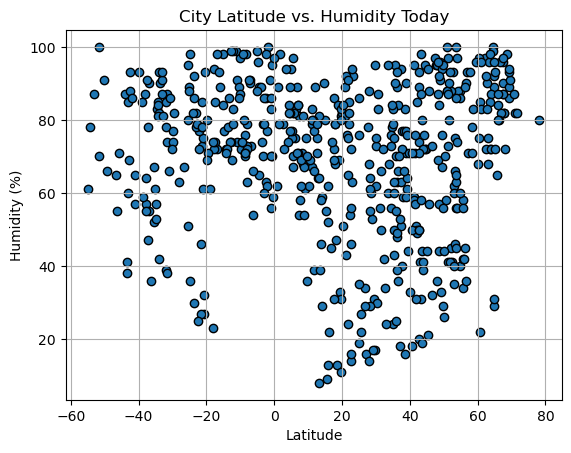

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity Today")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

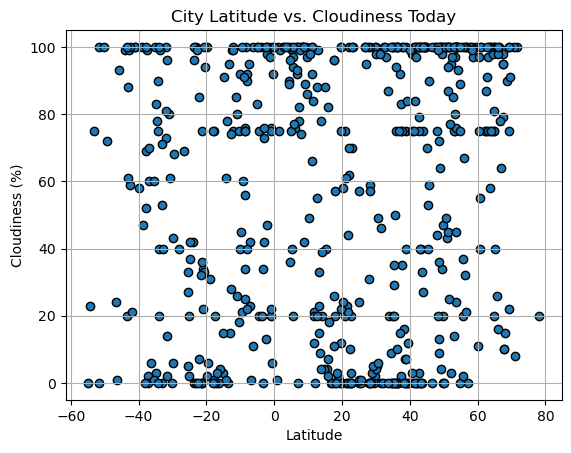

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness Today")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

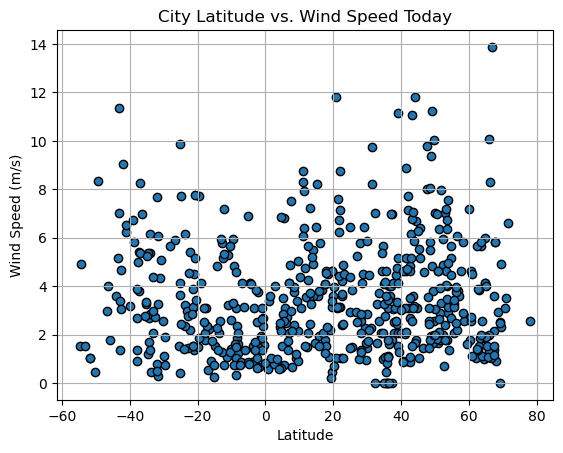

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed Today")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [3]:
# Define a function to create Linear Regression plots
def linear_reg(current_df, y):
    plt.scatter(current_df["Lat"],current_df[y],edgecolor="black")
    plt.title("City Latitude vs "+y+" Today")
    plt.xlabel("Latitude")
    plt.ylabel(y)

    m, b = np.polyfit(current_df["Lat"], current_df[y], 1)
    plt.plot(current_df["Lat"], m*(current_df["Lat"]) + b , color="red")
# The code above was provided by a fellow student in the class along with an explination on how the methods in this defined functions work and will interact with later code

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,omdurman,15.6445,32.4777,30.06,9,4,3.59,SD,1714014226
2,igarka,67.4667,86.5833,-7.21,90,79,3.58,RU,1714014228
5,bubaque,11.2833,-15.8333,25.77,67,100,6.39,GW,1714014231
6,anadyr,64.7500,177.4833,-2.72,92,100,6.00,RU,1714014216
8,dalnegorsk,44.5604,135.5701,12.56,95,100,1.79,RU,1714014233


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kone,-21.0595,164.8658,27.89,61,22,4.49,NC,1714014227
3,avarua,-21.2078,-159.7750,26.03,73,75,3.09,CK,1714014229
4,bonito,-21.1211,-56.4819,24.30,75,34,1.35,BR,1714014043
7,villa dolores,-31.9459,-65.1896,15.38,78,100,0.80,AR,1714014060
11,esmeraldas,-19.7625,-44.3139,23.17,80,2,1.47,BR,1714013955


###  Temperature vs. Latitude Linear Regression Plot

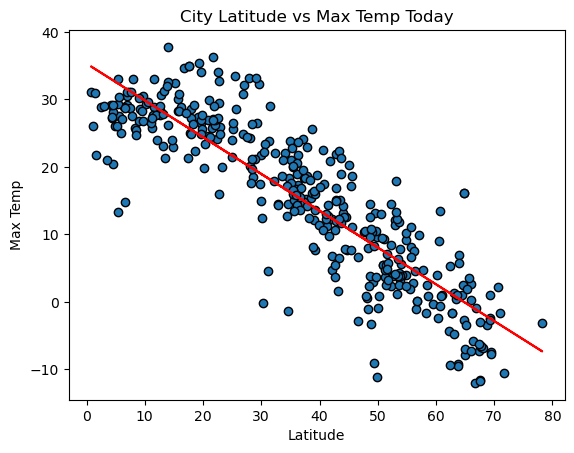

In [36]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df, "Max Temp")

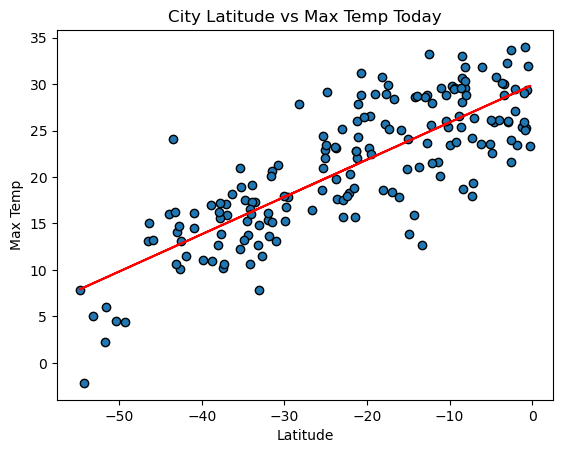

In [6]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df, "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

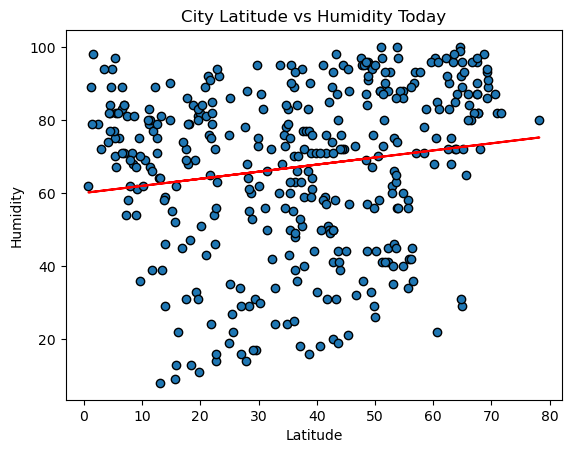

In [7]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Humidity")

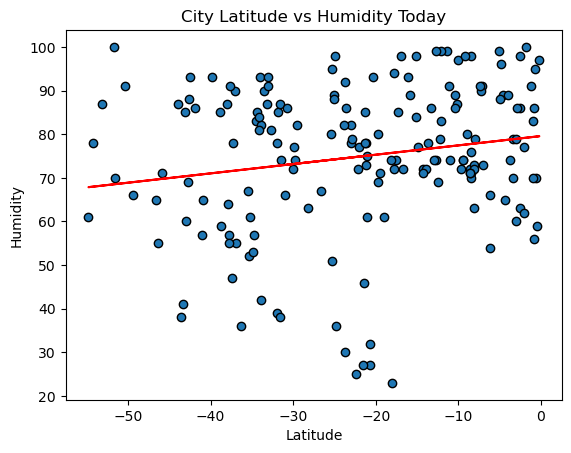

In [8]:
# Southern Hemisphere
linear_reg(southern_hemi_df, "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

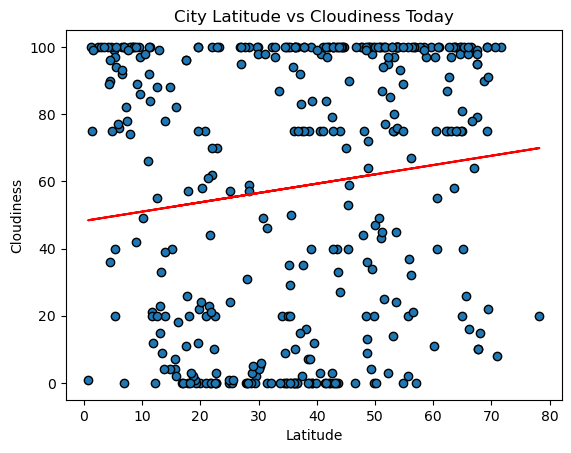

In [9]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Cloudiness")

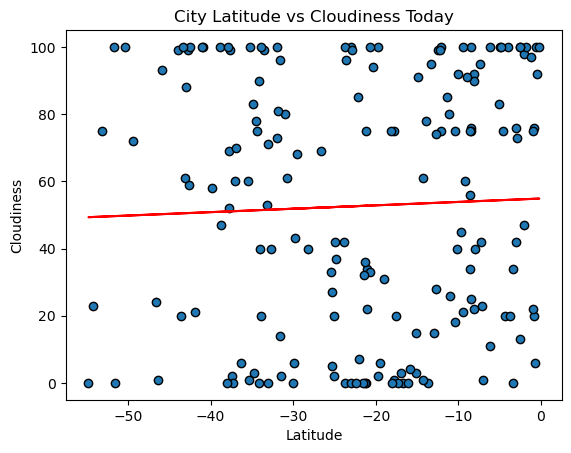

In [10]:
# Southern Hemisphere
linear_reg(southern_hemi_df, "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

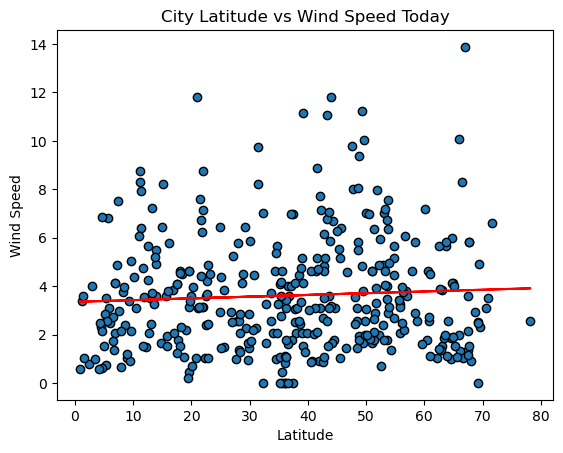

In [11]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Wind Speed")

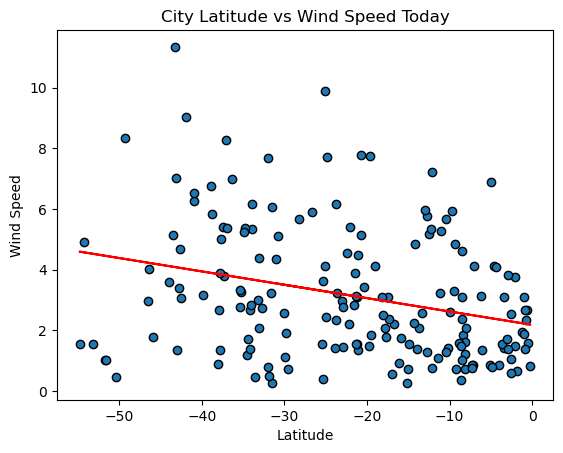

In [12]:
# Southern Hemisphere
linear_reg(southern_hemi_df, "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE